In [1]:
!pip install music21

In [2]:
!pip install midi2audio

In [3]:
!pip install fluidsynth

  Created wheel for fluidsynth: filename=fluidsynth-0.2-cp36-none-any.whl size=4513 sha256=6f20ac65d9e85583f1799827fe79e65d0e22b095fc3e0409c619e05470b16b29
  Stored in directory: /root/.cache/pip/wheels/2d/70/4d/ffe2589bbfe9c268780570a6875583fbf59547004459e2c3c3
Successfully built fluidsynth


In [4]:
!apt install fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth1 libqt5x11extras5 qsynth
Suggested packages:
  fluid-soundfont-gs timidity jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth1 libqt5x11extras5 qsynth
0 upgraded, 5 newly installed, 0 to remove and 35 not upgraded.
Need to get 120 MB of archives.
After this operation, 150 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libfluidsynth1 amd64 1.1.9-1 [137 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fluidsynth amd64 1.1.9-1 [20.7 kB]
Get:4 http://archive.ub

In [5]:
# ต้องใช้ sound font ด้วย ลองหา .sf2 ก่อน
!find / -name *.sf2

/usr/share/sounds/sf2/FluidR3_GM.sf2
/usr/local/lib/python2.7/dist-packages/pretty_midi/TimGM6mb.sf2
/tensorflow-1.15.2/python3.6/pretty_midi/TimGM6mb.sf2


In [6]:
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
cd './drive/My Drive/Automated Music Generation'

/content/drive/My Drive/Automated Music Generation


In [9]:
!unzip 'schubert.zip' -d './../../../Midi_files'

Archive:  schubert.zip
  inflating: ./../../../Midi_files/schubert_D850_1.mid  
  inflating: ./../../../Midi_files/schubert_D850_2.mid  
  inflating: ./../../../Midi_files/schubert_D850_3.mid  
  inflating: ./../../../Midi_files/schubert_D850_4.mid  
  inflating: ./../../../Midi_files/schubert_D935_1.mid  
  inflating: ./../../../Midi_files/schubert_D935_2.mid  
  inflating: ./../../../Midi_files/schubert_D935_3.mid  
  inflating: ./../../../Midi_files/schubert_D935_4.mid  
  inflating: ./../../../Midi_files/schub_d760_1.mid  
  inflating: ./../../../Midi_files/schub_d760_2.mid  
  inflating: ./../../../Midi_files/schub_d760_3.mid  
  inflating: ./../../../Midi_files/schub_d760_4.mid  
  inflating: ./../../../Midi_files/schub_d960_1.mid  
  inflating: ./../../../Midi_files/schub_d960_2.mid  
  inflating: ./../../../Midi_files/schub_d960_3.mid  
  inflating: ./../../../Midi_files/schub_d960_4.mid  
  inflating: ./../../../Midi_files/schuim-1.mid  
  inflating: ./../../../Midi_files/schu

In [10]:
cd './../../../'

/content


In [11]:
from midi2audio import FluidSynth

In [12]:
from music21 import *
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [13]:
#defining function to read MIDI files
def read_midi(file):
    
    print("Loading Music File:",file)
    
    notes=[]
    notes_to_parse = None
    
    #parsing a midi file
    midi = converter.parse(file)
  
    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:
    
        #select elements of only piano
        if 'Piano' in str(part): 
        
            notes_to_parse = part.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [14]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='./Midi_files/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])

Loading Music File: ./Midi_files/schub_d760_1.mid
Loading Music File: ./Midi_files/schu_143_2.mid
Loading Music File: ./Midi_files/schumm-5.mid
Loading Music File: ./Midi_files/schub_d960_4.mid
Loading Music File: ./Midi_files/schub_d760_3.mid
Loading Music File: ./Midi_files/schumm-1.mid
Loading Music File: ./Midi_files/schub_d960_3.mid
Loading Music File: ./Midi_files/schuim-2.mid
Loading Music File: ./Midi_files/schub_d760_2.mid
Loading Music File: ./Midi_files/schuim-4.mid
Loading Music File: ./Midi_files/schu_143_3.mid
Loading Music File: ./Midi_files/schub_d960_2.mid
Loading Music File: ./Midi_files/schub_d760_4.mid
Loading Music File: ./Midi_files/schubert_D850_2.mid
Loading Music File: ./Midi_files/schumm-2.mid
Loading Music File: ./Midi_files/schu_143_1.mid
Loading Music File: ./Midi_files/schuim-3.mid
Loading Music File: ./Midi_files/schubert_D850_4.mid
Loading Music File: ./Midi_files/schubert_D935_4.mid
Loading Music File: ./Midi_files/schubert_D935_1.mid
Loading Music File

In [15]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

304


(array([187.,  41.,  26.,  11.,   6.,   9.,  12.,   6.,   3.,   3.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <a list of 10 Patch objects>)

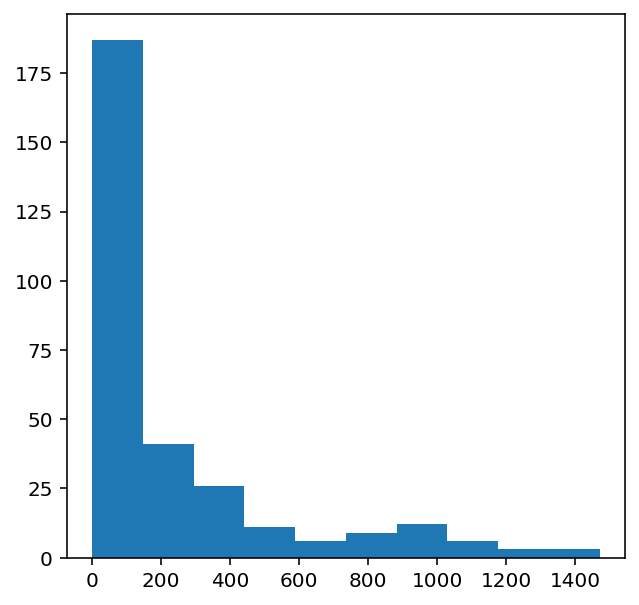

In [16]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [17]:
frequent_notes = [notes for notes, count in freq.items() if count>=40]
print(len(frequent_notes))

177


In [18]:
new_music =[]

for notes in notes_array:
  temp = []
  for note in notes:
    if note in frequent_notes:
      temp.append(note)
  new_music.append(temp)

new_music = np.array(new_music)

In [19]:
time_steps = 80
x = []
y = []

for notes in new_music:
  for i in range(0, len(notes)-time_steps):
    input = notes[i:i+time_steps]
    output = notes[i+time_steps]
    x.append(input)
    y.append(output)

x = np.array(x)
y = np.array(y)

In [20]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note, num) for num, note in enumerate(unique_x))

In [21]:
x_seq = []
for i in x:
  temp = []
  for n in i:
    temp.append(x_note_to_int[n])
  x_seq.append(temp)

x_seq = np.array(x_seq)

In [22]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [23]:
from sklearn.model_selection import train_test_split as tts
x_train, x_val, y_train, y_val = tts(x_seq, y_seq, test_size = 0.2, random_state=0)

In [24]:
x_vocab = len(unique_x)
y_vocab = len(unique_y)

BUFFER_SIZE = len(x_train)
BATCH_SIZE = 64
steps_per_epoch = len(x_train)//BATCH_SIZE
embedding_dim = 256
units = 1024

In [25]:
x_train_tensor = tf.convert_to_tensor(x_train)
y_train_tensor = tf.convert_to_tensor(y_train)
x_val_tensor = tf.convert_to_tensor(x_val)
y_val_tensor = tf.convert_to_tensor(y_val)

dataset = tf.data.Dataset.from_tensor_slices((x_train_tensor, y_train_tensor)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
validation_data = tf.data.Dataset.from_tensor_slices((x_val_tensor, y_val_tensor)).batch(BATCH_SIZE, drop_remainder=True)

In [26]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 80]), TensorShape([64]))

In [57]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_size):
    super(Encoder, self).__init__()
    self.vocab_size = vocab_size
    self.batch_size = batch_size
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.bigru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(enc_units, return_sequences=True, return_state=True))

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state, _ = self.bigru(x, [hidden, hidden])
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_size, self.enc_units))

In [68]:
encoder = Encoder(x_vocab, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 80, 2048)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [69]:
class Attention(tf.keras.Model):
  def __init__(self, units):
    super(Attention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.fc = tf.keras.layers.Dense(1)

  def call(self, query, values):
    query_expanded = tf.expand_dims(query, axis=1)

    score = self.fc(tf.nn.tanh(self.W1(query_expanded) + self.W2(values)))

    attention_weights = tf.nn.softmax(score, axis=1)

    context_vector = attention_weights*values
    context_vector = tf.reduce_sum(context_vector, axis = 1)

    return context_vector, attention_weights

In [70]:
attention_layer = Attention(units)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 2048)
Attention weights shape: (batch_size, sequence_length, 1) (64, 80, 1)


In [71]:
class Predictor(tf.keras.Model):
  def __init__(self, vocab_size):
    super(Predictor, self).__init__()
    self.vocab_size = vocab_size
    self.fc = tf.keras.layers.Dense(vocab_size)

  def call(self, x):
    return self.fc(x)

In [72]:
decoder = Predictor(y_vocab)

In [73]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
train_loss = tf.keras.metrics.Mean(name='train_loss')
val_loss = tf.keras.metrics.Mean(name='validation_loss')

In [74]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder,
                                 atttention_layer=attention_layer)

In [75]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0
  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)
    attention_result, _ = attention_layer(enc_hidden, enc_output)
    result = decoder(attention_result)
    loss = loss_object(targ, result)
  
  variables = encoder.trainable_variables + attention_layer.trainable_variables + decoder.trainable_variables
  
  gradients = tape.gradient(loss, variables)
  
  optimizer.apply_gradients(zip(gradients, variables))

  train_loss(loss)

In [76]:
@tf.function
def validation_step(inp, targ, enc_hidden):
  enc_output, enc_hidden = encoder(inp, enc_hidden)
  attention_result, _ = attention_layer(enc_hidden, enc_output)
  result = decoder(attention_result)

  loss_t = loss_object(targ, result)
  val_loss(loss_t)

In [77]:
EPOCHS = 10
Best_loss = 1000000

for epoch in range(EPOCHS):
  enc_hidden = encoder.initialize_hidden_state()
  train_loss.reset_states()
  val_loss.reset_states()

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    train_step(inp, targ, enc_hidden)

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   train_loss.result()))
  enc_hidden = encoder.initialize_hidden_state()
  
  for (inp, targ) in validation_data:
    validation_step(inp, targ, enc_hidden)
  
  
  print('Epoch: {}, Train_Loss: {:.4f},  Validation_loss: {:.4f}'.format(epoch + 1,
                                      train_loss.result(), val_loss.result()))
  
  
  if val_loss.result()<Best_loss:
    Best_loss = val_loss.result()
    print("Performance Improved!!!!! Saving Model Checkpoint....................")
    checkpoint.save(file_prefix = checkpoint_prefix)

Epoch 1 Batch 0 Loss 5.1771
Epoch 1 Batch 100 Loss 4.7912
Epoch 1 Batch 200 Loss 4.5112
Epoch 1 Batch 300 Loss 4.3273
Epoch 1 Batch 400 Loss 4.1767
Epoch 1 Batch 500 Loss 4.0660
Epoch 1 Batch 600 Loss 3.9797
Epoch 1 Batch 700 Loss 3.9043
Epoch: 1, Train_Loss: 3.8461,  Validation_loss: 3.3424
Performance Improved!!!!! Saving Model Checkpoint....................
Epoch 2 Batch 0 Loss 3.0984
Epoch 2 Batch 100 Loss 3.2516
Epoch 2 Batch 200 Loss 3.2219
Epoch 2 Batch 300 Loss 3.2062
Epoch 2 Batch 400 Loss 3.1867
Epoch 2 Batch 500 Loss 3.1505
Epoch 2 Batch 600 Loss 3.1259
Epoch 2 Batch 700 Loss 3.1077
Epoch: 2, Train_Loss: 3.0893,  Validation_loss: 2.9421
Performance Improved!!!!! Saving Model Checkpoint....................
Epoch 3 Batch 0 Loss 2.6676
Epoch 3 Batch 100 Loss 2.6798
Epoch 3 Batch 200 Loss 2.6906
Epoch 3 Batch 300 Loss 2.6727
Epoch 3 Batch 400 Loss 2.6705
Epoch 3 Batch 500 Loss 2.6530
Epoch 3 Batch 600 Loss 2.6349
Epoch 3 Batch 700 Loss 2.6221
Epoch: 3, Train_Loss: 2.6090,  Valid

In [78]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [79]:
import random
import music21

def generate_music(Notes_len=10, filename='music.mid'):
    ind = np.random.randint(0,len(x_val)-1)

    random_music = x_val[ind]

    predictions=[]
    for i in range(Notes_len):

        random_music = random_music.reshape(1,time_steps)
        input = tf.convert_to_tensor(random_music)
        hidden = tf.zeros((1, units))
        enc_output, enc_hidden = encoder(input, hidden)
        attention_result, _ = attention_layer(enc_hidden, enc_output)
        prob = decoder(attention_result)

        y_pred= tf.argmax(prob[0]).numpy()
        predictions.append(y_pred)

        random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
        random_music = random_music[1:]
    
    x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
    predicted_notes = [x_int_to_note[i] for i in predictions]

    def convert_to_midi(prediction_output, filename):
   
        offset = 0
        output_notes = []

        # create note and chord objects based on the values generated by the model
        for pattern in prediction_output:
            
            # pattern is a chord
            if ('.' in pattern) or pattern.isdigit():
                notes_in_chord = pattern.split('.')
                notes = []
                for current_note in notes_in_chord:
                    
                    cn=int(current_note)
                    new_note = music21.note.Note(cn)
                    new_note.storedInstrument = instrument.Piano()
                    notes.append(new_note)
                    
                new_chord = chord.Chord(notes)
                new_chord.offset = offset
                output_notes.append(new_chord)
                
            # pattern is a note
            else:
                
                new_note = music21.note.Note(pattern)
                new_note.offset = offset
                new_note.storedInstrument = instrument.Piano()
                output_notes.append(new_note)

            # increase offset each iteration so that notes do not stack
            offset += 1
        midi_stream = stream.Stream(output_notes)
        midi_stream.write('midi', fp=filename)

    convert_to_midi(predicted_notes, filename)
    
    return predicted_notes

In [80]:
for i in range(1, 5):
  _ = generate_music(filename=str('./music_' + str(i) + '_.mid'))

In [81]:
!fluidsynth -ni font.sf2 './music_1_.mid' -F 'output_1.wav' -r 44100
!fluidsynth -ni font.sf2 './music_2_.mid' -F 'output_2.wav' -r 44100
!fluidsynth -ni font.sf2 './music_3_.mid' -F 'output_3.wav' -r 44100
!fluidsynth -ni font.sf2 './music_4_.mid' -F 'output_4.wav' -r 44100

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_1.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_2.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_3.wav'..
FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_4.wav'..


In [82]:
from IPython.display import display
from IPython.display import Audio

In [83]:
display(Audio('output_1.wav'))
display(Audio('output_2.wav'))
display(Audio('output_3.wav'))
display(Audio('output_4.wav'))

In [89]:
generate_music(Notes_len=30, filename=str('./music_long'+ '_.mid'))

['B5',
 'D6',
 'B5',
 'F#5',
 'F#5',
 'B5',
 'F#5',
 'D5',
 'D5',
 'F#5',
 'D5',
 'B4',
 'B4',
 'D5',
 'B4',
 'F#4',
 '10.1',
 '4.6',
 'D6',
 'B2',
 'F#6',
 'D6',
 'B5',
 'B5',
 'F#5',
 'B5',
 'F#5',
 'D5',
 'F#5',
 'D5']

In [90]:
!fluidsynth -ni font.sf2 './music_long_.mid' -F 'output_long.wav' -r 44100

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

Rendering audio to file 'output_long.wav'..


In [91]:
display(Audio('output_long.wav'))